<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate mask recognition.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
# Import all necessary libraries.
import sys
import os
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load default configuration file.
NOMEROFF_NET_DIR = "../"
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, "Mask_RCNN/")
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs/")

sys.path.append(NOMEROFF_NET_DIR)

In [3]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters

Using TensorFlow backend.
W0708 18:44:44.778686 140546283238720 deprecation_wrapper.py:119] From ../NomeroffNet/Detector.py:12: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0708 18:44:44.779556 140546283238720 deprecation_wrapper.py:119] From ../NomeroffNet/Detector.py:14: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [4]:
# Initialize the detector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)

In [5]:
# Load weights in keras format.
nnet.loadModel("latest")

W0708 18:44:45.200175 140546283238720 deprecation_wrapper.py:119] From /usr/local/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 18:44:45.205032 140546283238720 deprecation_wrapper.py:119] From /usr/local/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 18:44:45.208416 140546283238720 deprecation_wrapper.py:119] From /usr/local/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 18:44:45.243600 140546283238720 deprecation_wrapper.py:119] From /usr/local/lib64/python3.6/site-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0708 18:44:45.246156 1

The nnet.detect method is passed an array of image paths that are processed simultaneously. If you have a GPU, change the IMAGES_PER_GPU parameter in the configuration and pass the specified number of images to the function, this will significantly increase the recognition speed.
More about the returned detect method object [here](https://github.com/ria-com/nomeroff-net/blob/master/docs/MASK_RCNN_RETURNS_OBJECT.md/ "More about the returned detect method object").

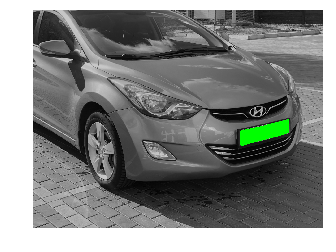

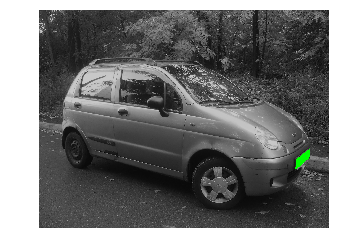

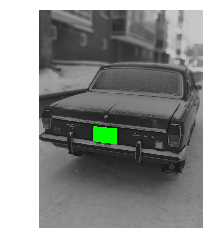

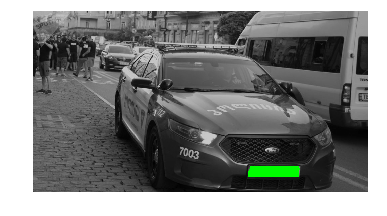

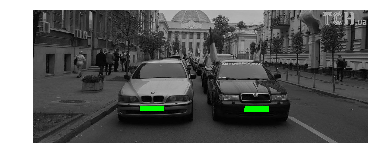

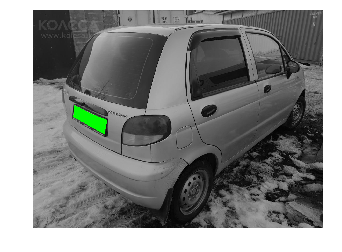

In [6]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'images/'

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)
        
        np = nnet.detect([img])
    
        # Generate splashs.
        splashs = filters.color_splash(img, np)
        for splash in splashs:
            plt.imshow(splash)
            plt.axis("off")
            plt.show()